In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft

# fpath = '../data/vop/GNUWCM3.npy'
# fpath = '../data/vop/MPLP4X7.npy'
fpath = '../data/vop/VHD2WU6.npy'

name = os.path.split(fpath)[1].split('.')[0]
print(name)

VHD2WU6


In [16]:
ds_video = np.load(fpath)
ds_video = np.flip(ds_video, axis=-1)
print(ds_video.shape)

fs = 30
N = ds_video.shape[0]
print("assuming", 30, "fps")
print("duration", N/fs, "s")

(2419, 96, 54, 3)
assuming 30 fps
duration 80.63333333333334 s


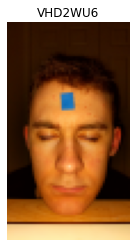

In [17]:
plt.imshow(ds_video[0,:,:,:])
plt.axis('off')
plt.title(name)
plt.show()

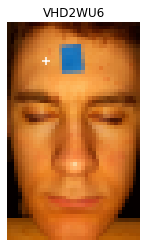

In [18]:
# video = ds_video[:,25:-15,11:-9,:] # GNU
# video = ds_video[:,25:-15,15:-5,:] # MPL
video = ds_video[:,25:-12,9:-9,:] # VHD
plt.imshow(video[0,:,:,:])
plt.scatter(10,10,c='w',marker='+',s=50)
plt.axis('off')
plt.title(name)
plt.show()

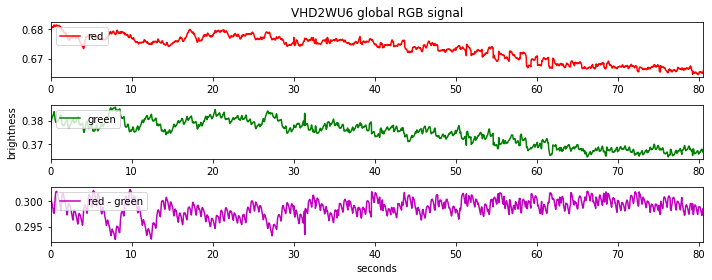

In [21]:
mean_rgb = np.mean(video, axis=(1,2))
r, g, b = mean_rgb[:,0], mean_rgb[:,1], mean_rgb[:,2]

t = np.arange(N) / fs

plt.figure(figsize=(10,4))
plt.subplot(3, 1, 1)
plt.plot(t, r, c='r', label='red')
plt.title(name+ " global RGB signal")
plt.xlim(t.min(), t.max())
plt.legend(loc='upper left')
plt.subplot(3, 1, 2)
plt.plot(t, g, c='g', label='green')
plt.xlim(t.min(), t.max())
plt.legend(loc='upper left')
plt.ylabel("brightness")
plt.subplot(3, 1, 3)
plt.plot(t, r-g, c='m', label='red - green')
plt.xlim(t.min(), t.max())
plt.legend(loc='upper left')
plt.xlabel("seconds")
plt.tight_layout()
plt.savefig('../yayayay.jpg')
plt.show()

4.766666666666667


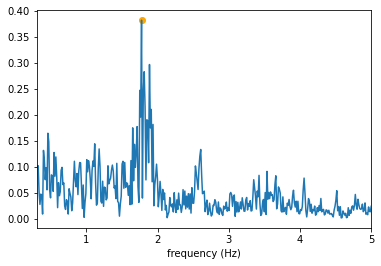

In [22]:
f = np.arange(N) * fs / N
fa, fb = 0.3, 5
fwin = (f > fa) & (f <= fb)

psd = np.abs(fft(r-g))

hr_loc = np.argmax(psd[fwin]) + np.argmax(fwin)
hr = (hr_loc) / fs
print(hr)

plt.plot(f[fwin], psd[fwin])
plt.scatter(f[hr_loc], psd[hr_loc], c='orange')
plt.xlim(fa, fb)
plt.xlabel("frequency (Hz)")
plt.show()

ref_val = fft(r-g)[hr_loc]

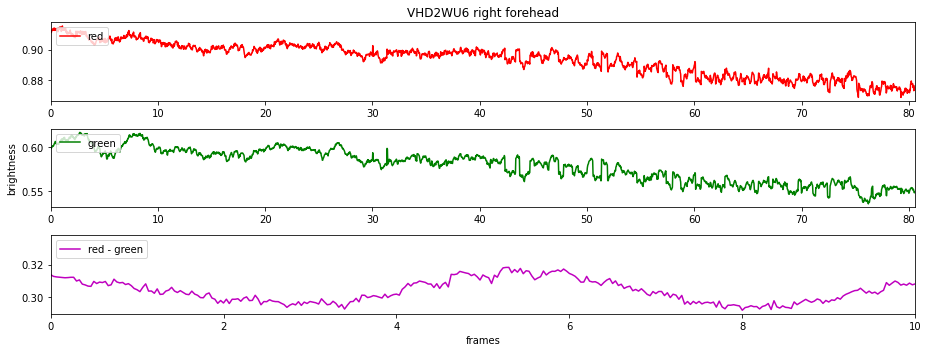

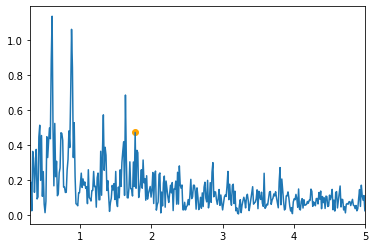

In [24]:
region = video[:,10,10,:]
r, g, b = region[:,0], region[:,1], region[:,2]

plt.figure(figsize=(13,5))
plt.subplot(3, 1, 1)
plt.plot(t, r, c='r', label='red')
plt.title(name + " right forehead")
plt.xlim(t.min(), t.max())
plt.legend(loc='upper left')
plt.subplot(3, 1, 2)
plt.plot(t, g, c='g', label='green')
plt.xlim(t.min(), t.max())
plt.legend(loc='upper left')
plt.ylabel("brightness")
plt.subplot(3, 1, 3)
plt.plot(t, r-g, c='m', label='red - green')
plt.xlim(t.min(), 10)
plt.legend(loc='upper left')
plt.xlabel("frames")
plt.tight_layout()
plt.savefig('../yayayay.jpg')
plt.show()

psd = np.abs(fft(r-g))

plt.plot(f[fwin], psd[fwin])
plt.scatter(f[hr_loc], psd[hr_loc], c='orange')
plt.xlim(fa, fb)
plt.show()


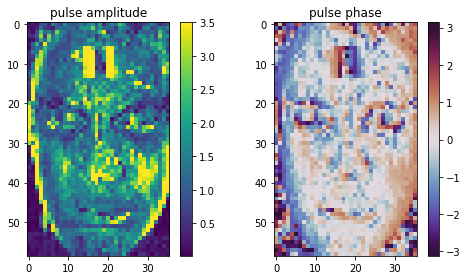

In [25]:
H, W = video.shape[1], video.shape[2]

pulsemap = np.empty((H, W), np.complex64)
for i in range(H):
    for j in range(W):
        r, g = video[:,i,j,0], video[:,i,j,1]
        pulsemap[i,j] = fft(r-g)[hr_loc] / ref_val

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.imshow(np.abs(pulsemap), cmap='viridis', vmax=3.5)
# plt.imshow(np.abs(pulsemap), cmap='viridis', vmin=0, vmax=1)
plt.colorbar()
plt.title("pulse amplitude")
plt.subplot(1,2,2)
plt.imshow(np.angle(pulsemap), cmap='twilight_shifted')
plt.title("pulse phase")
plt.colorbar()
plt.tight_layout()
plt.savefig('./figs/'+name+'_pulsemap.png')
plt.show()